In [2]:
from google.colab import files

uploaded = files.upload()

Saving carInsurance_test.csv to carInsurance_test.csv
Saving carInsurance_train.csv to carInsurance_train.csv


'''I use Google Coloboratory ,as my machine cannot handle these large computations


The aim is to build a classifier to predict the success rate of car insurance cold calls.
This is more focussed on modelling of the classifier
'''


In [3]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# the datsets are loaded into the the dataframes
import io
train= pd.read_csv(io.StringIO(uploaded['carInsurance_train.csv'].decode('utf-8')))
test= pd.read_csv(io.StringIO(uploaded['carInsurance_test.csv'].decode('utf-8')))

# Look at missing values percentage for each attribute
print("Missing % of attributes in Train")
print( train.apply(lambda x: x.isnull().sum()*100.0/len(train),axis=0) )
print("Missing % of attributes in Test")
print( test.apply(lambda x: x.isnull().sum()*100.0/len(test),axis=0) )

# Look at percentage of rows having atleast one missing value
print("Missing % of attributes in Train")
print(train.apply(lambda x: 1 if x.isnull().sum() > 0 else 0,axis=1).sum() /len(train))
print("Missing % of attributes in Test")
print(test.apply(lambda x: 1 if x.isnull().sum() > 0 else 0,axis=1).sum() / len(test))

# Percentage of patients who have a Car Insurance
print(train.CarInsurance.value_counts() * 100.0 / len(train))

Missing % of attributes in Train
Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64
Missing % of attributes in Test
Id                    0.0
Age                   0.0
Job                   0.5
Marital               0.0
Education             4.7
Default               0.0
Balance               0.0
HHInsurance           0.0
CarLoan               0.0
Communication        22.1
LastContactDay        0.0
LastContactMonth      0.0
NoOfContacts          0.0
DaysPassed            0.0
PrevAttempts          0.0
Outcome          

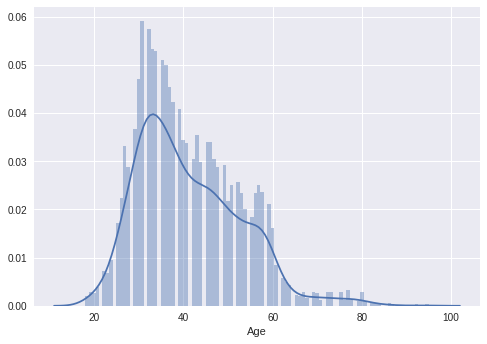

In [4]:
import seaborn as sns
# Age
# Distribution Of Age
sns.distplot(train.Age,bins=100)
plt.show()

98417

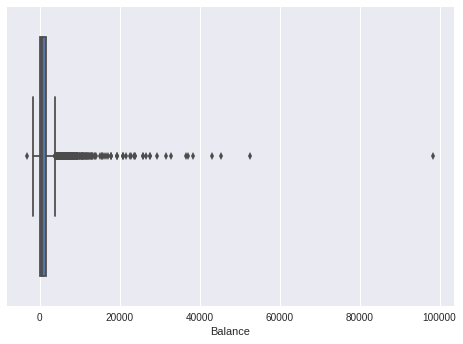

In [5]:
#Removal of Outliers from Balance and DaysPassed variables
sns.boxplot(x= 'Balance',data=train)
train.Balance.max()

In [6]:
train[train['Balance']==98417]


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [0]:
train_new = train.drop(train.index[1742])

In [8]:
train_new[train_new['Balance']==98417]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


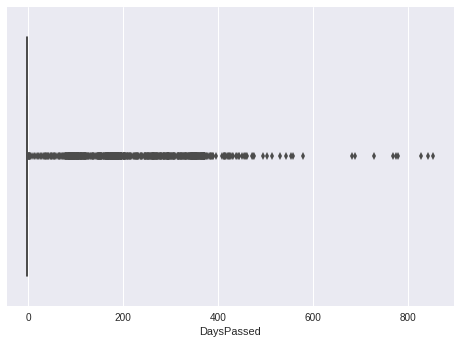

In [9]:
sns.boxplot(train_new['DaysPassed'])

train_new[train_new['DaysPassed']>600]

train_new = train_new.drop([118,618,1147,1356,1913,1958,3136,3362,3590])

train_new[train_new['DaysPassed']>600]


In [10]:
#Filling the missing values using different methods


# Using frontfill to fill the missing values in Job and Education fields
train_new['Job'] = train_new['Job'].fillna(method ='pad')
train_new['Education'] = train_new['Education'].fillna(method ='pad')

# Using none to fill Nan values in Communication and Outcome fields
train_new['Communication'] = train_new['Communication'].fillna('none')
train_new['Outcome'] = train_new['Outcome'].fillna('none')

print("Missing % of attributes in Train")
print( train_new.apply(lambda x: x.isnull().sum()*100.0/len(train_new),axis=0) )

train_new.head()

Missing % of attributes in Train
Id                  0.0
Age                 0.0
Job                 0.0
Marital             0.0
Education           0.0
Default             0.0
Balance             0.0
HHInsurance         0.0
CarLoan             0.0
Communication       0.0
LastContactDay      0.0
LastContactMonth    0.0
NoOfContacts        0.0
DaysPassed          0.0
PrevAttempts        0.0
Outcome             0.0
CallStart           0.0
CallEnd             0.0
CarInsurance        0.0
dtype: float64


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,none,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,none,26,may,5,-1,0,none,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,none,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,none,14:35:44,14:38:56,0


In [11]:
# Fill missing outcome as not in previous campaign
train_new[train_new['DaysPassed']==-1].count()
train_new.loc[train_new['DaysPassed']==-1,'Outcome']='NoPrevContact'

train_new.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NoPrevContact,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,none,26,may,5,-1,0,NoPrevContact,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NoPrevContact,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NoPrevContact,14:35:44,14:38:56,0


In [12]:
#Feature Extraction

#Creating categorical variables for Age,Balance variables
train_new['AgeBinned'] = pd.qcut(train_new['Age'], 5 , labels = False)
train_new['BalanceBinned'] = pd.qcut(train_new['Balance'], 5,labels = False)

#Converting CallStart and CallEnd to datetime datatype
train_new['CallStart'] = pd.to_datetime(train_new['CallStart'] )
train_new['CallEnd'] = pd.to_datetime(train_new['CallEnd'] )
#Subtracting both the Start and End times to arrive at the actual CallTime
train_new['CallTime'] = (train_new['CallEnd'] - train_new['CallStart']).dt.total_seconds()
#Binning the CallTime
train_new['CallTimeBinned'] = pd.qcut(train_new['CallTime'], 5,labels = False)

#Dropping the original columns of the binned, just to make things easy
train_new.drop(['Age','Balance','CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

#Creating categorical variable for DaysPassed variable
train_new.loc[(train_new['DaysPassed']>=-1) & (train_new['DaysPassed']<0),'DaysPassedBin'] = 1
train_new.loc[(train_new['DaysPassed']>=0) & (train_new['DaysPassed']<20),'DaysPassedBin'] = 2
train_new.loc[(train_new['DaysPassed']>=20) & (train_new['DaysPassed']<50),'DaysPassedBin'] = 3
train_new.loc[(train_new['DaysPassed']>=50) & (train_new['DaysPassed']<100),'DaysPassedBin'] = 4
train_new.loc[(train_new['DaysPassed']>=100) & (train_new['DaysPassed']<300),'DaysPassedBin'] = 5
train_new.loc[(train_new['DaysPassed']>=300),'DaysPassedBin'] = 6
train_new['DaysPassedBin'] = train_new['DaysPassedBin'].astype(int)
train_new.drop(['DaysPassed'],axis = 1,inplace = True)

train_new.drop(['Id'],axis = 1,inplace = True)

train_new.head()

,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,PrevAttempts,Outcome,CarInsurance,AgeBinned,BalanceBinned,CallTimeBinned,DaysPassedBin
0,management,single,tertiary,0,1,0,telephone,28,jan,2,0,NoPrevContact,0,1,3,0,1
1,blue-collar,married,primary,0,1,0,none,26,may,5,0,NoPrevContact,0,1,3,2,1
2,management,single,tertiary,0,1,0,cellular,3,jun,1,1,failure,1,0,2,3,5
3,student,single,primary,0,1,0,cellular,11,may,2,0,NoPrevContact,1,0,2,4,1
4,management,married,tertiary,0,0,0,cellular,3,jun,1,0,NoPrevContact,0,0,4,2,1


In [0]:

#Splitting data into features and target variable
X= train_new.drop(['CarInsurance'],axis=1)
Y= train_new['CarInsurance']

In [0]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()
X['Job']=labelencoder.fit_transform(X['Job'])
X['Marital']=labelencoder.fit_transform(X['Marital'])
X['Education']=labelencoder.fit_transform(X['Education'])
X['Communication']=labelencoder.fit_transform(X['Communication'])
X['LastContactMonth']=labelencoder.fit_transform(X['LastContactMonth'])
X['Outcome']=labelencoder.fit_transform(X['Outcome'])
X['AgeBinned']=labelencoder.fit_transform(X['AgeBinned'])
X['BalanceBinned']=labelencoder.fit_transform(X['BalanceBinned'])
X['CallTimeBinned']=labelencoder.fit_transform(X['CallTimeBinned'])
X['DaysPassedBin']=labelencoder.fit_transform(X['DaysPassedBin'])
onehotencoder=OneHotEncoder(categorical_features=(0,1,2,6,7,8,12,13,14,15))
X = onehotencoder.fit_transform(X)

In [0]:
import warnings
warnings.filterwarnings('ignore')
#data divided into train and test  
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [38]:
import warnings
warnings.filterwarnings('ignore')
# Cross Validation Engine for predicting the different model's preformance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix,make_scorer
import xgboost as xgb 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression

cls={"DT":DecisionTreeClassifier(),"xgb":xgb.XGBClassifier(objective='binary:logistic', seed=1),'RF':RandomForestClassifier(random_state=123),'SVM':SVC(kernel='rbf'),'LR':LogisticRegression(random_state=123),'LinearSVC':LinearSVC()}
dic={}
trainaccs={}
testaccs={}
for i,j in cls.items():
	classifier1=j
	classifier1.fit(x_train,y_train)
	cv_score=cross_val_score(j,x_train,y_train,cv=10,scoring='accuracy')
	print("\nCross validation score of classifier",i,"on data is ",cv_score.mean())
	#mean accuracy score of classifier  on training set 
	tr1=classifier1.score(x_train,y_train)
	trainaccs[i]=tr1
	print ("----mean Training accuracy of--",i,"--classifier is ->>",tr1)
	#mean accuracy score of classifier  on testing  set
	tr2=classifier1.score(x_test,y_test)
	testaccs[i]=tr2
	print ("----mean Testing accuracy of--",i,"--classifier is ->>",tr2)

	y_preddt=classifier1.predict(x_test)

	from sklearn.metrics import roc_auc_score
	r=roc_auc_score(y_test, y_preddt)
	dic[i]=r
	print ("the roc_auc_score is for model",i ,"is",r*100)



Cross validation score of classifier DT on data is  0.7713084200824115
----mean Training accuracy of-- DT --classifier is ->> 1.0
----mean Testing accuracy of-- DT --classifier is ->> 0.7556390977443609
the roc_auc_score is for model DT is 75.1903651903652

Cross validation score of classifier xgb on data is  0.842405974596321
----mean Training accuracy of-- xgb --classifier is ->> 0.8615288220551378
----mean Testing accuracy of-- xgb --classifier is ->> 0.8320802005012531
the roc_auc_score is for model xgb is 82.82439782439782

Cross validation score of classifier RF on data is  0.8157816535557263
----mean Training accuracy of-- RF --classifier is ->> 0.9896616541353384
----mean Testing accuracy of-- RF --classifier is ->> 0.8107769423558897
the roc_auc_score is for model RF is 80.38267288267289

Cross validation score of classifier SVM on data is  0.8057571136708661
----mean Training accuracy of-- SVM --classifier is ->> 0.8220551378446115
----mean Testing accuracy of-- SVM --classi

''' 
We look at the Cross validation score, mean training accuracy, mean testing accuracy and roc_auc score.

We found that XGBoost Classifier is the best performing clasifier.

Random Forest Classifier and Decision Tree Classifiers are overfitting the data , as the variance is high. 
'''


In [23]:
#Hyperparameter tuning using GridSearchCV
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb 
classifier = xgb.XGBClassifier(objective='binary:logistic', seed=123)

from sklearn.grid_search import GridSearchCV
n_estimators=[10,50,100,200,300]
max_depth=[2,3,4,5]
learning_rate=[0.1,0.01]
colsample_bytree=[0.5,0.6,0.7]
min_child_weight=[1,2,3]
gamma=[0.001,0.01,0.1]
subsample=[0.6,0.7,0.8]

param_grid=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,colsample_bytree=colsample_bytree,min_child_weight=min_child_weight,gamma=gamma,subsample=subsample)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(X, Y)
grid.grid_scores_

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)



0.8471177944862155
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=True,
       subsample=0.8)


In [56]:
import warnings
warnings.filterwarnings('ignore')

#Best model is XGB Classifier
import xgboost as xgb 
#best parameters obtained through gridsearch is applied
classifier = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree=0.6,learning_rate=0.1,max_depth=3,n_estimators=200,gamma=0.1,min_child_weight=1,subsample=0.8,seed=1)
#fitting the model to the training set
classifier.fit(x_train, y_train)

# Predicting the Test set results
Y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

print('Final Model Accuracy: %.5f'%(accuracy_score(y_test,Y_pred)))

Final Model Accuracy: 0.84461
